In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
system_dialog_prototype_comparison = pd.read_csv("translations_scores/system_dialog_prototype_experiments.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_23632\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


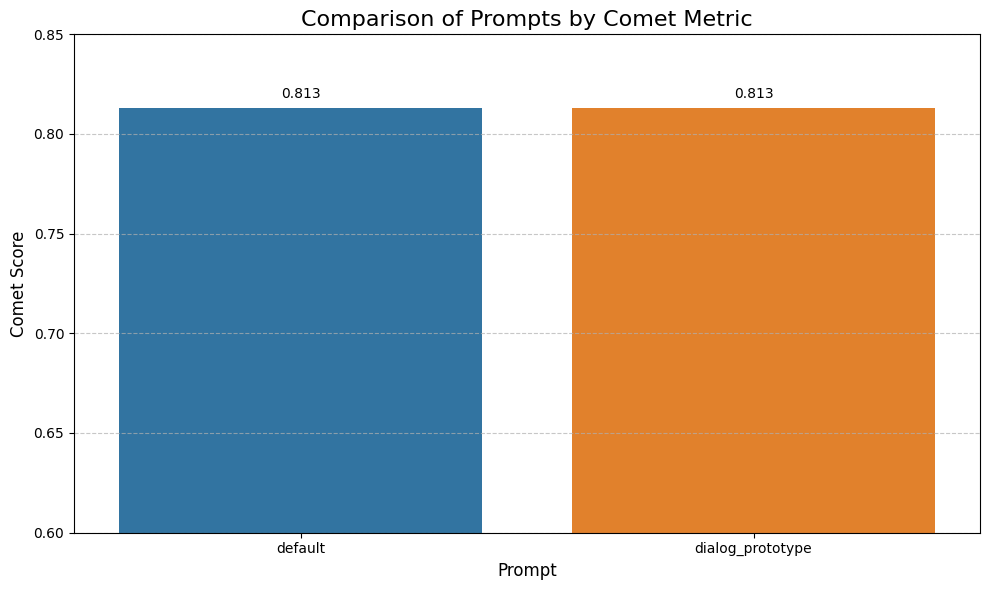

C:\Users\kajet\AppData\Local\Temp\ipykernel_23632\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


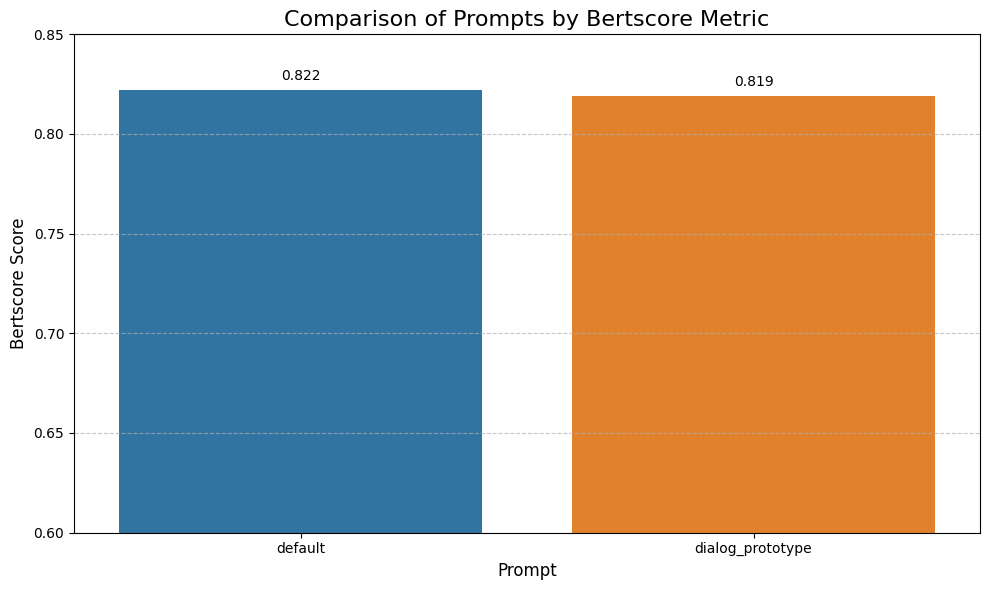

C:\Users\kajet\AppData\Local\Temp\ipykernel_23632\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


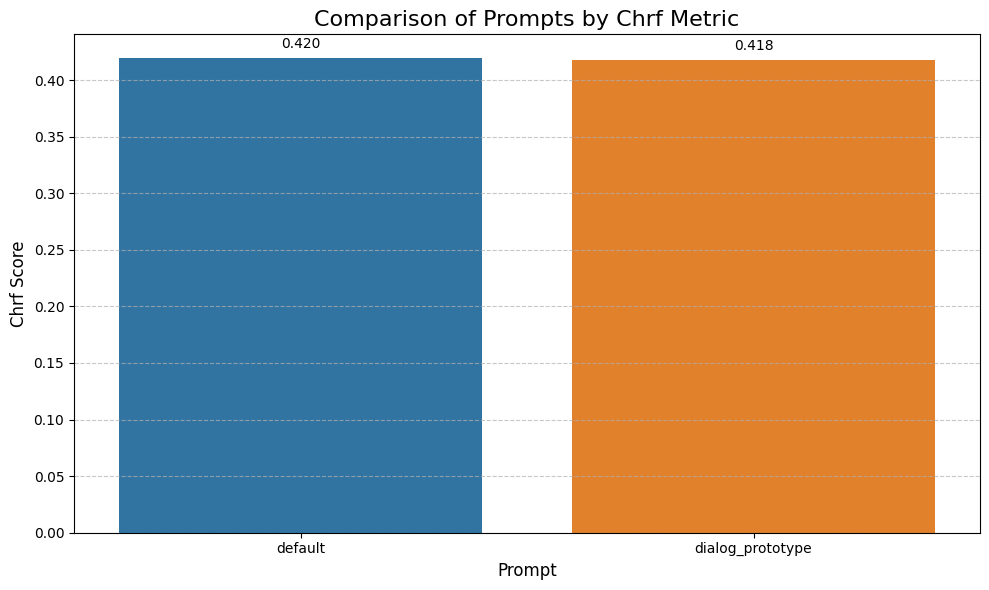

C:\Users\kajet\AppData\Local\Temp\ipykernel_23632\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


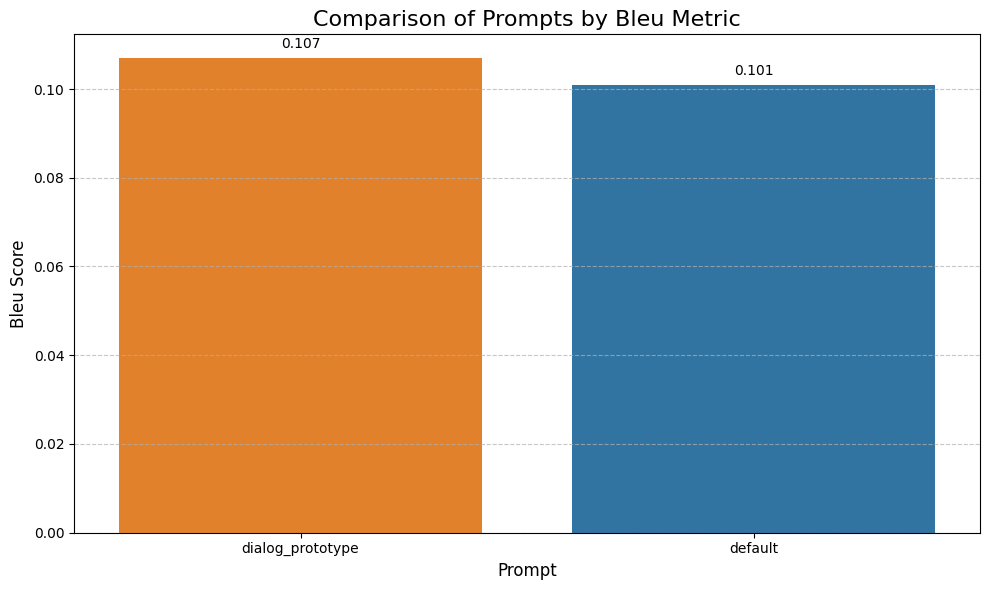

In [3]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparison.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparison.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparison[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
dialog_prototype_comparison = pd.read_csv("translations_scores/dialog_prototype_experiments.csv")

In [7]:
sorted_df = dialog_prototype_comparison.sort_values(by='comet_default', ascending=True)
top_5_lowest = sorted_df.head(10)
result = top_5_lowest[['comet_default', 'default', 'dialog_prototype', 'en_text', 'pl_text']]
result

,comet_default,default,dialog_prototype,en_text,pl_text
1107,0.244561,"Cholera jasna, leje.","Cholera, ale leje!","Blast it all, it's pourin'.","W dupę jeża, ale chlupa."
1529,0.278968,Cholera jasna.,Cholera jasna.,Bloody hell.,Kurwa mać.
824,0.299936,"Dubhenn w cieniu, światło w mroku.","Światło, które przecina ciemności, blask, któr...","Dubhenn haern am glâdeal, morc'h am fhean aiesin.","„Dubhenn haern am glâdeal, morc’h am fhean aie..."
1266,0.319714,Wypija chciwymi haustami.,Wypija je chciwymi haustami.,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
1136,0.338975,Umblest regards.\n\nNie otrzymałem żadnego tek...,Niech cię Bóg błogosławi.,Umblest regards.,"A kłaniam się, kłaniam."
124,0.339109,Troll bang-bang. W głowie.,Uderzam w głowę trolla.,Bang-bang troll. In noggin.,Coś mnie kuje. We łbie.
963,0.341954,"Trzydziestu trzech złodziei myślało, że będą b...","Trzydziestu trzech złodziei myślało, że będą r...",The thirty-three thieves thought they thrilled...,"Szelestnym szemrzą brzozy szeptem, ha!?"
1774,0.348426,"Poparzone dłonie, może... ale przebite?","Poparzone ręce, może... ale przebite?","Singed hands, maybe… but impaled?",Sparzyć... Nie spłonąć.
812,0.359281,Dalej z tym - chwyć cipę.,Bierz ją - chwytaj kurwę.,On with it - grab the cunt.,Gońcie sukę.
1225,0.359348,Troll nie chce walić-walić.,Nie chcę być uderzany - uderzany - chcę mieć p...,Troll no thwacky-thwack wanna.,Nie lubię agresja.


In [8]:
sorted_df = dialog_prototype_comparison.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(10)
result = top_5_lowest[['comet_dialog_prototype','dialog_prototype', 'default', 'en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,default,en_text,pl_text
1529,0.278968,Cholera jasna.,Cholera jasna.,Bloody hell.,Kurwa mać.
1700,0.299377,Nie zatrzymam się na jego lasce.,"Lód... to zaklęcie. Musisz znaleźć maga, który...",The ice… it's a spell. You must find the mage ...,Ten lód... To zaklęcie. Musisz zniszczyć kostu...
824,0.314195,"Światło, które przecina ciemności, blask, któr...","Dubhenn w cieniu, światło w mroku.","Dubhenn haern am glâdeal, morc'h am fhean aiesin.","„Dubhenn haern am glâdeal, morc’h am fhean aie..."
842,0.337425,"Tak. O mniej więcej tyle, co by mi brakowało n...","Mhm. Mniej więcej tyle, co bym tęsknił za noże...",Mhm. About as much as I'd miss a knife in my k...,Mhm. Jak gwoździ w kalesonach.
1774,0.344469,"Poparzone ręce, może... ale przebite?","Poparzone dłonie, może... ale przebite?","Singed hands, maybe… but impaled?",Sparzyć... Nie spłonąć.
1266,0.346602,Wypija je chciwymi haustami.,Wypija chciwymi haustami.,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
1107,0.347590,"Cholera, ale leje!","Cholera jasna, leje.","Blast it all, it's pourin'.","W dupę jeża, ale chlupa."
1893,0.350304,Cóż... Kawałki niestrawionego jedzenia. Kilka ...,No? Coś ciekawego?,So? Anything interesting?,No i jak? Coś ciekawego?
826,0.366266,"Pamiętam... Choć sama podziwiałam to, co miała...",Przepaść pod nami była zapierająca dech - szum...,Chasm below us was breathtaking - rustling tre...,"W dole była piękna przepaść, szumiały drzewa, ..."
963,0.371967,"Trzydziestu trzech złodziei myślało, że będą r...","Trzydziestu trzech złodziei myślało, że będą b...",The thirty-three thieves thought they thrilled...,"Szelestnym szemrzą brzozy szeptem, ha!?"
